# Linear Algebra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

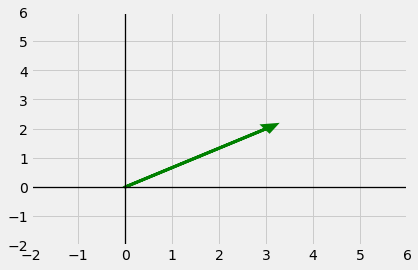

In [2]:
a = [3,2]

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-2,6)
plt.ylim(-2,6)


plt.arrow(0,0, a[0], a[1], head_width = .25, head_length = .25, linewidth = 3, color = 'green')

plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm of a vector represents that magnitude or "length" of the vector. Since the length is always postitive, it is an absolute value. 

In [3]:
b = [17,-4,-2,1]

np.linalg.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.matrix([[7,4,2],
              [1,3,-1],
              [2,6,-4]])
E

matrix([[ 7,  4,  2],
        [ 1,  3, -1],
        [ 2,  6, -4]])

In [6]:
# Transpose of the Matrix

E.T

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

In [7]:
# Inverse of the Matrix

np.linalg.inv(E)

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [8]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [9]:
print('Customers Mean: ' , df.describe().T[0:1]['mean'].values.tolist())
print('Customers SDev: ' , df.describe().T[0:1]['std'].values.tolist())
print('Customers Vars: ' , np.var(df['customers']))
print()
print('Snow Mean: ' , df.describe().T[1:2]['mean'].values.tolist())
print('Snow SDev: ' , df.describe().T[1:2]['std'].values.tolist())
print('Snow Vars: ' , np.var(df['snow']))

Customers Mean:  [1135.7142857142858]
Customers SDev:  [314.26406851866597]
Customers Vars:  84653.06122448981

Snow Mean:  [2.7142857142857144]
Snow SDev:  [2.9277002188455996]
Snow Vars:  7.346938775510203


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Not really. Although they illustrate the same thing in the data, the variance of the Customer Count is wildly out of proporiton due to the values of the data compared to the Snowfall values. This is due to the variance being squared, thus resulting in wildly higher variances for datasets with large values. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [10]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [11]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [12]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [13]:
df.columns.values.tolist()
P_columns = ['Cheese','Carcass_Meat','Other_Meat','Fish','Fats_and_Oils','Sugars','Fresh_Potatoes',
              'Fresh_Veg','Other_Veg','Processed_Potatoes','Processed_Veg','Fresh_Fruit','Cereals',
              'Beverages','Soft_Drinks','Alcoholic Drinks','Confectionery']

P_group = df[P_columns]

In [14]:
scaled = pd.DataFrame(scale(P_group), columns = P_columns)

scaled

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

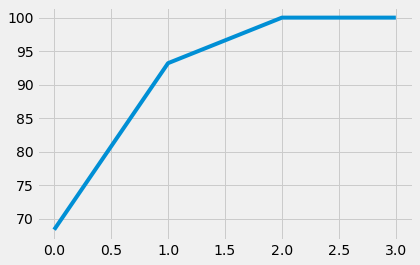

In [15]:
pca = PCA(n_components = 4)
pca.fit(scaled)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var);

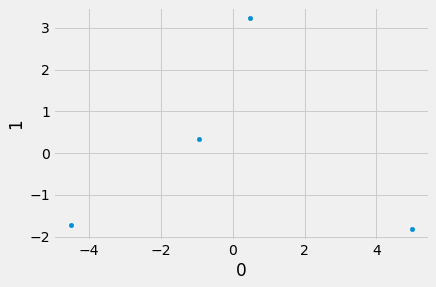

In [16]:
#It looks like my ideal PCA is 2 components

pca = PCA(n_components = 2)
pca.fit(scaled)

X=pca.fit_transform(scaled)

pd.DataFrame(X).plot.scatter(0,1);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [17]:
from sklearn.cluster import KMeans

In [18]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


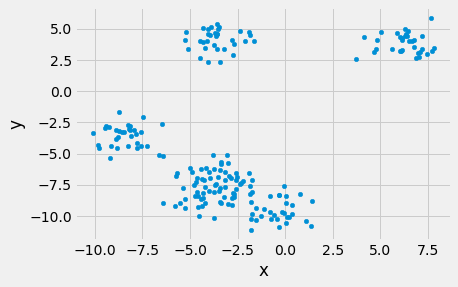

In [19]:
points.plot.scatter('x','y')

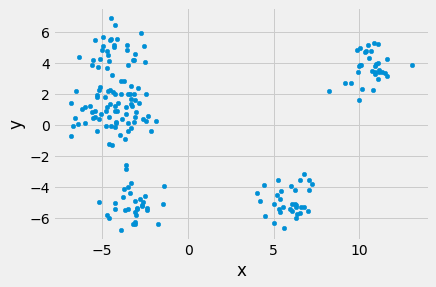

In [20]:
# Well that already looks very clustery. Lets make it more clustery!

pca = PCA(n_components = 2)
pca.fit(points)

P=pca.fit_transform(points)
Pdf = pd.DataFrame(P, columns = ['x','y'])
Pdf.plot.scatter(0,1);

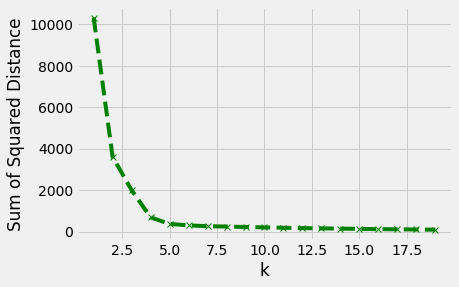

In [21]:
# Use Elbow Method to find optimal k
sums = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km = km.fit(P)
    sums.append(km.inertia_)

plt.plot(range(1,20), sums, 'gx--')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.show();

In [22]:
# Looks like it might be optimal to use either 2 or 4. 
# Based on eyballing the scatter plot, I am going to try 4

kmeans = KMeans(n_clusters = 4, random_state = 0).fit(P)
Z = kmeans.fit_predict(P)
points['cluster'] = Z
Pdf['cluster'] = Z
clusters = kmeans.cluster_centers_

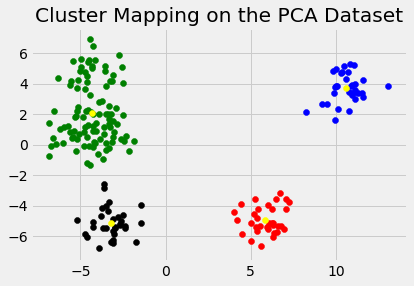

In [23]:
plt.style.use('fivethirtyeight')

plt.scatter(Pdf.loc[Pdf['cluster'] == 0]['x'], Pdf.loc[Pdf['cluster'] == 0]['y'], color = 'red')
plt.scatter(Pdf.loc[Pdf['cluster'] == 1]['x'], Pdf.loc[Pdf['cluster'] == 1]['y'], color = 'green')
plt.scatter(Pdf.loc[Pdf['cluster'] == 2]['x'], Pdf.loc[Pdf['cluster'] == 2]['y'], color = 'blue')
plt.scatter(Pdf.loc[Pdf['cluster'] == 3]['x'], Pdf.loc[Pdf['cluster'] == 3]['y'], color = 'black')
plt.scatter(clusters[:,0], clusters[:,1], color = 'yellow')


plt.title('Cluster Mapping on the PCA Dataset')

plt.show()

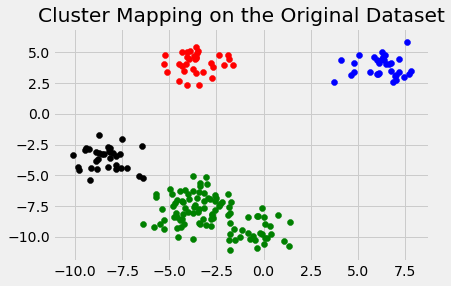

In [24]:
plt.style.use('fivethirtyeight')

plt.scatter(points.loc[points['cluster'] == 0]['x'], points.loc[points['cluster'] == 0]['y'], color = 'red')
plt.scatter(points.loc[points['cluster'] == 1]['x'], points.loc[points['cluster'] == 1]['y'], color = 'green')
plt.scatter(points.loc[points['cluster'] == 2]['x'], points.loc[points['cluster'] == 2]['y'], color = 'blue')
plt.scatter(points.loc[points['cluster'] == 3]['x'], points.loc[points['cluster'] == 3]['y'], color = 'black')

plt.title('Cluster Mapping on the Original Dataset')

plt.show()